In [189]:
import re
import numpy as np
import pandas as pd
from gensim.utils import deaccent
import spacy
import collections
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

In [190]:
"""
Data available at:
https://www.cij.gov.ar/d/sentencia-SGU-a73eca73-7f37-4ddd-b476-629f1644d6e4.pdf
"""

file_content = open("../data/raw/fallo_diana_sacayan.txt", "r").read()
print(file_content)

Poder Judicial de la Nación 
TRIBUNAL ORAL EN LO CRIMINAL Y CORRECCIONAL NRO. 4 DE LA CAPITAL FEDERAL 
CCC 62182/2015/TO1 
///DAMENTOS del veredicto dictado el 18 de junio de 2018, 
por el TRIBUNAL ORAL en lo CRIMINAL y CORRECCIONAL Nº 4, 
de la Capital Federal, sus integrantes Dres. Ivana Bloch, 
Julio César Báez y Adolfo Calvete, actuando este último 
como Presidente, a fin de dar lectura a la sentencia 
dictada en la causa nro. 62.162/2015 (nro. interno 5268) 
seguida contra Gabriel David MARINO (argentino, titular 
de D.N.I. 37.171.736, nacido el 28 de octubre de 1992, 
hijo de Claudio Fabián y de Claudia Alejandra Remón, 
soltero, con estudios secundarios completos, identificado 
con legajo serie SP 124.465 de la Policía Federal 
Argentina y 02804662 del Registro Nacional de 
Reincidencia, con último domicilio previo a ser detenido 
en la calle Donato Álvarez 731 de Morón, Provincia de 
Buenos Aires y, actualmente, alojado en el Complejo 
Penitenciario Federal I –Ezeiza-, a dispos

In [191]:
# Remove accents
cleaned_text = deaccent(file_content)
print(cleaned_text)

Poder Judicial de la Nacion 
TRIBUNAL ORAL EN LO CRIMINAL Y CORRECCIONAL NRO. 4 DE LA CAPITAL FEDERAL 
CCC 62182/2015/TO1 
///DAMENTOS del veredicto dictado el 18 de junio de 2018, 
por el TRIBUNAL ORAL en lo CRIMINAL y CORRECCIONAL Nº 4, 
de la Capital Federal, sus integrantes Dres. Ivana Bloch, 
Julio Cesar Baez y Adolfo Calvete, actuando este ultimo 
como Presidente, a fin de dar lectura a la sentencia 
dictada en la causa nro. 62.162/2015 (nro. interno 5268) 
seguida contra Gabriel David MARINO (argentino, titular 
de D.N.I. 37.171.736, nacido el 28 de octubre de 1992, 
hijo de Claudio Fabian y de Claudia Alejandra Remon, 
soltero, con estudios secundarios completos, identificado 
con legajo serie SP 124.465 de la Policia Federal 
Argentina y 02804662 del Registro Nacional de 
Reincidencia, con ultimo domicilio previo a ser detenido 
en la calle Donato Alvarez 731 de Moron, Provincia de 
Buenos Aires y, actualmente, alojado en el Complejo 
Penitenciario Federal I –Ezeiza-, a dispos

In [192]:
# Replace specific characters with spaces
cleaned_text = (
    cleaned_text.replace("\n", " ")
    .replace("\r", " ")
    .replace("\t", " ")
    .replace("\f", " ")
    .replace("\v", " ")
)
# Remove extra spaces
cleaned_text = " ".join(cleaned_text.split())
print(cleaned_text)

Poder Judicial de la Nacion TRIBUNAL ORAL EN LO CRIMINAL Y CORRECCIONAL NRO. 4 DE LA CAPITAL FEDERAL CCC 62182/2015/TO1 ///DAMENTOS del veredicto dictado el 18 de junio de 2018, por el TRIBUNAL ORAL en lo CRIMINAL y CORRECCIONAL Nº 4, de la Capital Federal, sus integrantes Dres. Ivana Bloch, Julio Cesar Baez y Adolfo Calvete, actuando este ultimo como Presidente, a fin de dar lectura a la sentencia dictada en la causa nro. 62.162/2015 (nro. interno 5268) seguida contra Gabriel David MARINO (argentino, titular de D.N.I. 37.171.736, nacido el 28 de octubre de 1992, hijo de Claudio Fabian y de Claudia Alejandra Remon, soltero, con estudios secundarios completos, identificado con legajo serie SP 124.465 de la Policia Federal Argentina y 02804662 del Registro Nacional de Reincidencia, con ultimo domicilio previo a ser detenido en la calle Donato Alvarez 731 de Moron, Provincia de Buenos Aires y, actualmente, alojado en el Complejo Penitenciario Federal I –Ezeiza-, a disposicion de este Trib

In [193]:
# Lowerize text
cleaned_text = cleaned_text.lower()
print(cleaned_text)

poder judicial de la nacion tribunal oral en lo criminal y correccional nro. 4 de la capital federal ccc 62182/2015/to1 ///damentos del veredicto dictado el 18 de junio de 2018, por el tribunal oral en lo criminal y correccional nº 4, de la capital federal, sus integrantes dres. ivana bloch, julio cesar baez y adolfo calvete, actuando este ultimo como presidente, a fin de dar lectura a la sentencia dictada en la causa nro. 62.162/2015 (nro. interno 5268) seguida contra gabriel david marino (argentino, titular de d.n.i. 37.171.736, nacido el 28 de octubre de 1992, hijo de claudio fabian y de claudia alejandra remon, soltero, con estudios secundarios completos, identificado con legajo serie sp 124.465 de la policia federal argentina y 02804662 del registro nacional de reincidencia, con ultimo domicilio previo a ser detenido en la calle donato alvarez 731 de moron, provincia de buenos aires y, actualmente, alojado en el complejo penitenciario federal i –ezeiza-, a disposicion de este trib

In [194]:
def remove_special_characters(text):
    # Remove special characters using regular expression
    cleaned_text = re.sub(r"[^a-zA-Z\s]", " ", text)
    return cleaned_text


def remove_numbers(text):
    # Remove numbers using regular expression
    cleaned_text = re.sub(r"\d", " ", text)
    return cleaned_text


cleaned_text = remove_special_characters(cleaned_text)
cleaned_text = remove_numbers(cleaned_text)

print(cleaned_text)

 poder judicial de la nacion tribunal oral en lo criminal y correccional nro    de la capital federal ccc            to     damentos del veredicto dictado el    de junio de       por el tribunal oral en lo criminal y correccional n     de la capital federal  sus integrantes dres  ivana bloch  julio cesar baez y adolfo calvete  actuando este ultimo como presidente  a fin de dar lectura a la sentencia dictada en la causa nro               nro  interno       seguida contra gabriel david marino  argentino  titular de d n i              nacido el    de octubre de       hijo de claudio fabian y de claudia alejandra remon  soltero  con estudios secundarios completos  identificado con legajo serie sp         de la policia federal argentina y          del registro nacional de reincidencia  con ultimo domicilio previo a ser detenido en la calle donato alvarez     de moron  provincia de buenos aires y  actualmente  alojado en el complejo penitenciario federal i  ezeiza   a disposicion de este tri

In [195]:
# Load spaCy large model for Spanish
nlp = spacy.load("es_core_news_lg")

# Process the text using the loaded model
doc = nlp(cleaned_text)

# Filter stop words in Spanish
filtered_tokens = [token.text for token in doc if not token.is_stop]

# Filter tokens with lenght longer than 1 character
filtered_tokens = [token for token in filtered_tokens if len(token) > 1]

print(filtered_tokens)

['judicial', 'nacion', 'tribunal', 'oral', 'criminal', 'correccional', 'nro', '   ', 'capital', 'federal', 'ccc', '           ', 'to', '    ', 'damentos', 'veredicto', 'dictado', '   ', 'junio', '      ', 'tribunal', 'oral', 'criminal', 'correccional', '    ', 'capital', 'federal', 'integrantes', 'dres', 'ivana', 'bloch', 'julio', 'cesar', 'baez', 'adolfo', 'calvete', 'actuando', 'presidente', 'lectura', 'sentencia', 'dictada', 'causa', 'nro', '              ', 'nro', 'interno', '      ', 'seguida', 'gabriel', 'david', 'marino', 'argentino', 'titular', '             ', 'nacido', '   ', 'octubre', '      ', 'hijo', 'claudio', 'fabian', 'claudia', 'alejandra', 'remon', 'soltero', 'estudios', 'secundarios', 'completos', 'identificado', 'legajo', 'serie', 'sp', '        ', 'policia', 'federal', 'argentina', '         ', 'registro', 'nacional', 'reincidencia', 'domicilio', 'previo', 'detenido', 'calle', 'donato', 'alvarez', '    ', 'moron', 'provincia', 'aires', 'actualmente', 'alojado', 'c

In [196]:
# Remove leading and trailing whitespaces from each string in the list
tokens = [x.strip() for x in filtered_tokens]

tokens = [x for x in tokens if x != ""]

print(tokens)

['judicial', 'nacion', 'tribunal', 'oral', 'criminal', 'correccional', 'nro', 'capital', 'federal', 'ccc', 'to', 'damentos', 'veredicto', 'dictado', 'junio', 'tribunal', 'oral', 'criminal', 'correccional', 'capital', 'federal', 'integrantes', 'dres', 'ivana', 'bloch', 'julio', 'cesar', 'baez', 'adolfo', 'calvete', 'actuando', 'presidente', 'lectura', 'sentencia', 'dictada', 'causa', 'nro', 'nro', 'interno', 'seguida', 'gabriel', 'david', 'marino', 'argentino', 'titular', 'nacido', 'octubre', 'hijo', 'claudio', 'fabian', 'claudia', 'alejandra', 'remon', 'soltero', 'estudios', 'secundarios', 'completos', 'identificado', 'legajo', 'serie', 'sp', 'policia', 'federal', 'argentina', 'registro', 'nacional', 'reincidencia', 'domicilio', 'previo', 'detenido', 'calle', 'donato', 'alvarez', 'moron', 'provincia', 'aires', 'actualmente', 'alojado', 'complejo', 'penitenciario', 'federal', 'ezeiza', 'disposicion', 'tribunal', 'vistos', 'reunen', 'integrantes', 'tribunal', 'oral', 'criminal', 'crimina

In [197]:
# Define a function to lemmatize text
def lemmatizer(text):
    doc = nlp(text)
    return " ".join([word.lemma_ for word in nlp(text)])


lemmatized_words = [lemmatizer(word) for word in tokens]

print(lemmatized_words)

['judicial', 'nacion', 'tribunal', 'oral', 'criminal', 'correccional', 'nro', 'capital', 'federal', 'ccc', 'to', 'damento', 'veredicto', 'dictado', 'junio', 'tribunal', 'oral', 'criminal', 'correccional', 'capital', 'federal', 'integrante', 'dr', 'ivana', 'bloch', 'julio', 'cesar', 'baez', 'adolfo', 'calvete', 'actuar', 'presidente', 'lectura', 'sentencia', 'dictado', 'causa', 'nro', 'nro', 'interno', 'seguido', 'gabriel', 'david', 'marino', 'argentino', 'titular', 'nacido', 'octubre', 'hijo', 'claudio', 'fabian', 'claudia', 'alejandra', 'remon', 'soltero', 'estudio', 'secundario', 'completo', 'identificado', 'legajo', 'serie', 'sp', 'policia', 'federal', 'argentino', 'registro', 'nacional', 'reincidencia', 'domicilio', 'previo', 'detenido', 'calle', 'donato', 'alvarez', 'moron', 'provincia', 'aires', 'actualmente', 'alojado', 'complejo', 'penitenciario', 'federal', 'ezeiza', 'disposicion', 'tribunal', 'ver', 'reunir', 'integrante', 'tribunal', 'oral', 'criminal', 'criminal', 'dr', 'ju

In [198]:
# Count the occurrences of each word
word_counts = collections.Counter(lemmatized_words)

print(word_counts)

Counter({'camara': 331, 'firmado': 320, 'juez': 241, 'fs': 198, 'diana': 153, 'persona': 103, 'informe': 86, 'marino': 85, 'veronica': 85, 'julio': 84, 'firma': 84, 'ivana': 82, 'bloch': 82, 'baez': 82, 'adolfo': 82, 'calvete': 82, 'fabian': 82, 'cesar': 81, 'secretario': 81, 'ignacio': 81, 'iriarte': 81, 'fecha': 80, 'genero': 71, 'travesti': 70, 'federal': 68, 'caso': 65, 'violencia': 60, 'odio': 57, 'tribunal': 55, 'crimen': 49, 'judicial': 48, 'criminal': 48, 'identidad': 48, 'oral': 46, 'nro': 45, 'sacayan': 44, 'cuerpo': 44, 'trans': 44, 'nacion': 43, 'correccional': 43, 'derecho': 43, 'capital': 41, 'ccc': 40, 'to': 40, 'victima': 40, 'lugar': 38, 'departamento': 38, 'inc': 37, 'prueba': 34, 'vida': 33, 'humano': 33, 'ver': 32, 'homicidio': 32, 'juicio': 32, 'penal': 31, 'colectivo': 31, 'relacion': 29, 'gabriel': 27, 'debate': 27, 'autor': 27, 'policia': 26, 'mujer': 26, 'muerte': 26, 'cometer': 26, 'dr': 25, 'contexto': 25, 'art': 25, 'discriminacion': 25, 'publico': 24, 'port

In [199]:
most_common_words = word_counts.most_common(110)

print(most_common_words)

[('camara', 331), ('firmado', 320), ('juez', 241), ('fs', 198), ('diana', 153), ('persona', 103), ('informe', 86), ('marino', 85), ('veronica', 85), ('julio', 84), ('firma', 84), ('ivana', 82), ('bloch', 82), ('baez', 82), ('adolfo', 82), ('calvete', 82), ('fabian', 82), ('cesar', 81), ('secretario', 81), ('ignacio', 81), ('iriarte', 81), ('fecha', 80), ('genero', 71), ('travesti', 70), ('federal', 68), ('caso', 65), ('violencia', 60), ('odio', 57), ('tribunal', 55), ('crimen', 49), ('judicial', 48), ('criminal', 48), ('identidad', 48), ('oral', 46), ('nro', 45), ('sacayan', 44), ('cuerpo', 44), ('trans', 44), ('nacion', 43), ('correccional', 43), ('derecho', 43), ('capital', 41), ('ccc', 40), ('to', 40), ('victima', 40), ('lugar', 38), ('departamento', 38), ('inc', 37), ('prueba', 34), ('vida', 33), ('humano', 33), ('ver', 32), ('homicidio', 32), ('juicio', 32), ('penal', 31), ('colectivo', 31), ('relacion', 29), ('gabriel', 27), ('debate', 27), ('autor', 27), ('policia', 26), ('mujer

In [200]:
df = pd.DataFrame(most_common_words, columns=["palabra", "cuenta"])

print(df)

       palabra  cuenta
0       camara     331
1      firmado     320
2         juez     241
3           fs     198
4        diana     153
..         ...     ...
105    sentido      16
106     hablar      16
107  domicilio      15
108      salir      15
109   explicar      15

[110 rows x 2 columns]


In [201]:
# Function to perform part-of-speech tagging for Spanish
def pos_tagging_spanish(text):
    doc = nlp(text)
    pos_tags = [(token.pos_) for token in doc]
    return pos_tags


# Apply part-of-speech tagging to the text_column
df["pos_tags"] = df["palabra"].apply(pos_tagging_spanish)


# Create new column for word types
def get_word_type(pos_tag):
    tag = pos_tag
    if tag in ["NOUN"]:
        return "sustantivo"
    elif tag in ["PROPN"]:
        return "nombre propio"
    elif tag in ["VERB"]:
        return "verbo"
    elif tag in ["ADJ"]:
        return "adjectivo"
    elif tag in ["ADV"]:
        return "adverbio"
    else:
        return "otro"


df["tipo_palabra"] = df["pos_tags"].apply(lambda x: [get_word_type(tag) for tag in x])

# Print the updated DataFrame
print(df)

       palabra  cuenta pos_tags     tipo_palabra
0       camara     331  [PROPN]  [nombre propio]
1      firmado     320    [ADJ]      [adjectivo]
2         juez     241   [NOUN]     [sustantivo]
3           fs     198   [NOUN]     [sustantivo]
4        diana     153   [NOUN]     [sustantivo]
..         ...     ...      ...              ...
105    sentido      16   [NOUN]     [sustantivo]
106     hablar      16   [VERB]          [verbo]
107  domicilio      15   [NOUN]     [sustantivo]
108      salir      15   [VERB]          [verbo]
109   explicar      15   [VERB]          [verbo]

[110 rows x 4 columns]


In [202]:
flattened_pos_tags = (
    df["pos_tags"]
    .apply(pd.Series)
    .stack()
    .reset_index(level=1, drop=True)
    .rename("pos_tags")
)

flattened_tipo_palabra = (
    df["tipo_palabra"]
    .apply(pd.Series)
    .stack()
    .reset_index(level=1, drop=True)
    .rename("tipo_palabra")
)

# Merge the flattened columns back into the original DataFrame
df = (
    df.drop(["pos_tags", "tipo_palabra"], axis=1)
    .join(flattened_pos_tags)
    .join(flattened_tipo_palabra)
)

df.to_csv("../data/processed/wordcloud.csv", index=False)

# Print the updated DataFrame
print(df)

       palabra  cuenta pos_tags   tipo_palabra
0       camara     331    PROPN  nombre propio
1      firmado     320      ADJ      adjectivo
2         juez     241     NOUN     sustantivo
3           fs     198     NOUN     sustantivo
4        diana     153     NOUN     sustantivo
..         ...     ...      ...            ...
105    sentido      16     NOUN     sustantivo
106     hablar      16     VERB          verbo
107  domicilio      15     NOUN     sustantivo
108      salir      15     VERB          verbo
109   explicar      15     VERB          verbo

[110 rows x 4 columns]


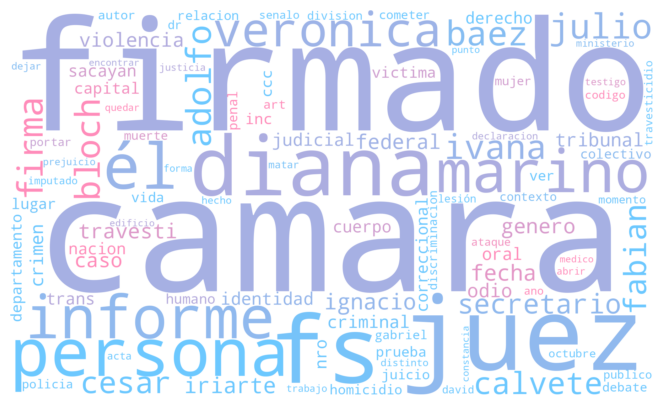

In [204]:
# Join the words into a single string
text = " ".join(lemmatized_words)

mask = np.array(Image.open("../assets/trans_flag_edited.png").convert("RGBA"))

# Generate the word cloud
wordcloud = WordCloud(
    mode="RGBA",
    width=1000,
    height=500,
    background_color="white",
    max_words=100,
    random_state=1,
    collocations=False,
    mask=mask,
).generate(text)

image_colors = ImageColorGenerator(mask)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("../outputs/figures/wordcloud.png", format="png")
plt.show()